## Imports

In [3]:
from matplotlib import gridspec
import pandas as pd
import math
import numpy as np

from pathlib import Path

import seaborn as sns
sns.set_theme()

import warnings
def relplot(*args, **kwargs):
        
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        return sns.relplot(*args, **kwargs)


simulations_path = Path('/home/selker/eop/eop/run_dry_run/simulations')
previous_simulations_path = Path('/home/selker/eop/eop/obsolete_run_simulations/results/top_line')
figs_path = Path(simulations_path / 'figs')
figs_path.mkdir(exist_ok=True)

# Hyperparam search

In [4]:
hyperparameter_output_directory = simulations_path / 'hparam' / 'results'
hyperparameters = dict()

## Binary gap

In [26]:
binary_gap_nn_results = pd.read_csv(hyperparameter_output_directory / 'nn_gt_binary_gap.csv')
averages = (
    binary_gap_nn_results
    .groupby(['n_layers', 'n_hidden_units', 'lr']).mean().reset_index()
)
binary_gap_hyperparameters = (
    averages.loc[averages["loss"].idxmin()].to_dict()
)

binary_gap_n_regressors_results = pd.read_csv(
    hyperparameter_output_directory / 'n_regressors_gt_binary_gap.csv'
)
averages = (
    binary_gap_n_regressors_results
    .groupby(['n_regressors']).mean().reset_index()
)
binary_gap_hyperparameters.update(
    averages.loc[averages["auc"].idxmin()].to_dict()
)

del binary_gap_hyperparameters['loss']
del binary_gap_hyperparameters["transfer_size"]
del binary_gap_hyperparameters["trial"]
del binary_gap_hyperparameters['auc']

hyperparameters['binary_gap'] = {'gt': binary_gap_hyperparameters}

## Continuous gap

In [27]:
continuous_gap_nn_results = pd.read_csv(hyperparameter_output_directory / 'nn_gt_continuous_gap.csv')
averages = (
    continuous_gap_nn_results
    .groupby(['n_layers', 'n_hidden_units', 'lr']).mean().reset_index()
)
continuous_gap_hyperparameters = (
    averages.loc[averages["pinball_loss"].idxmin()].to_dict()
)

continuous_gap_n_regressors_results = pd.read_csv(
    hyperparameter_output_directory / 'n_regressors_gt_continuous_gap.csv'
)
averages = (
    continuous_gap_n_regressors_results
    .groupby(['n_regressors']).mean().reset_index()
)
continuous_gap_hyperparameters.update(
    averages.loc[averages["auc"].idxmin()].to_dict()
)

del continuous_gap_hyperparameters['pinball_loss']
del continuous_gap_hyperparameters["quantile"]
del continuous_gap_hyperparameters["trial"]
del continuous_gap_hyperparameters['auc']

hyperparameters['continuous_gap'] = {'gt': continuous_gap_hyperparameters}

## Binary rate

In [33]:

binary_rate_nn_results = pd.read_csv(hyperparameter_output_directory / 'nn_gt_binary_rate.csv')
averages = (
    binary_rate_nn_results
    .groupby(['n_layers', 'n_hidden_units', 'lr']).mean().reset_index()
)
binary_rate_hyperparameters = (
    averages.loc[averages["loss"].idxmin()].to_dict()
)

binary_rate_n_regressors_results = pd.read_csv(
    hyperparameter_output_directory / 'n_regressors_gt_binary_rate.csv'
)
averages = (
    binary_rate_n_regressors_results
    .groupby(['n_regressors']).mean().reset_index()
)
binary_rate_hyperparameters.update(
    averages.loc[averages["auc"].idxmin()].to_dict()
)

del binary_rate_hyperparameters['loss']
del binary_rate_hyperparameters["transfer_size"]
del binary_rate_hyperparameters["trial"]
del binary_rate_hyperparameters['auc']


hyperparameters['binary_rate'] = {'gt': binary_rate_hyperparameters}

## Continuous rate

In [29]:
continuous_rate_n_alpha_results = pd.read_csv(
    hyperparameter_output_directory / 'n_alpha_gt_continuous_rate.csv'
)
averages = continuous_rate_n_alpha_results.groupby('n_alpha').mean().reset_index()
continuous_rate_hyperparameters = (
    averages.loc[averages["auc"].idxmin()].to_dict()
)

continuous_rate_density_estimation_results = pd.read_csv(
    hyperparameter_output_directory / 'density_estimation_gt_continuous_rate.csv'
)
averages = continuous_rate_density_estimation_results.groupby(
    ['degree', 'n_bins', 'n_knots', 'n_features']
).mean().reset_index()

continuous_rate_hyperparameters.update(
    averages.loc[averages["nll"].idxmin()].to_dict()
)
del continuous_rate_hyperparameters['auc']
del continuous_rate_hyperparameters['nll']
del continuous_rate_hyperparameters['trial']

hyperparameters['continuous_rate'] = {'gt': continuous_rate_hyperparameters}

## Default hyperparameters

In [36]:
from yaml import SafeLoader
with (simulations_path / 'hparam/configs/default_config.yml').open('r') as default_config_file:
    default_config = SafeLoader(default_config_file).get_data()

hyperparameter_name_map = {
    'num_hidden_layers': 'n_layers', 'num_hidden_units': 'n_hidden_units'
}

continuous_rate_default_hyperparameters = default_config['continuous_rate']
for key, value in continuous_rate_default_hyperparameters['density_estimation'].items():
    continuous_rate_default_hyperparameters[key] = value
del continuous_rate_default_hyperparameters['density_estimation']
hyperparameters['continuous_rate']['default'] = continuous_rate_default_hyperparameters

for model_type in ('continuous_gap', 'binary_gap', 'binary_rate'):
    default_hyperparameters = default_config[model_type]
    for key, value in default_hyperparameters['neural_network'].items():
        default_hyperparameters[hyperparameter_name_map.get(key, key)] = value
    del default_hyperparameters['neural_network']
    hyperparameters[model_type]['default'] = default_hyperparameters

for model_type, dict in hyperparameters.items():
    hyperparameters[model_type] = pd.DataFrame.from_dict(dict)

## Print results

In [ ]:
for key, value in hyperparameters.items():
    display(key)
    display(value)

# Covariate list

In [ ]:
data_path = Path('/data/eop/malawi/cleaned')
summary = pd.read_parquet(data_path / 'summary_2019.parquet')

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 1000):
    display(summary[['covariate', 'description']])

In [41]:
summary[summary.covariate == 'consumption_per_capita_per_day']['description'].values

array(['daily consumption per capita, in units of 2017 USD PPP'],
      dtype=object)

# Policy performance

In [8]:
malawi_population = 19025752
usd_ppp_per_nominal = 3.018521515
cost_conversion_factor = malawi_population * 365 / usd_ppp_per_nominal

## GT vs default

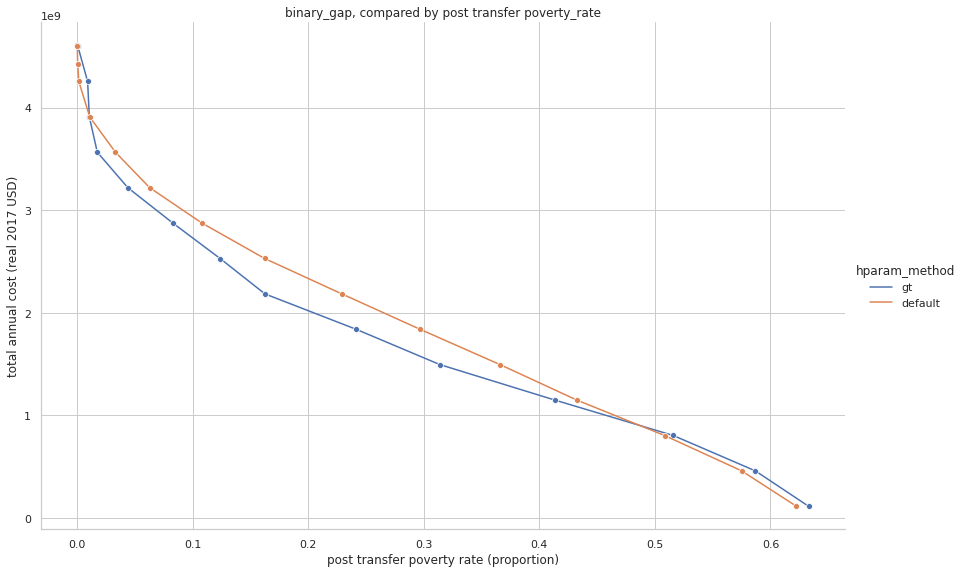

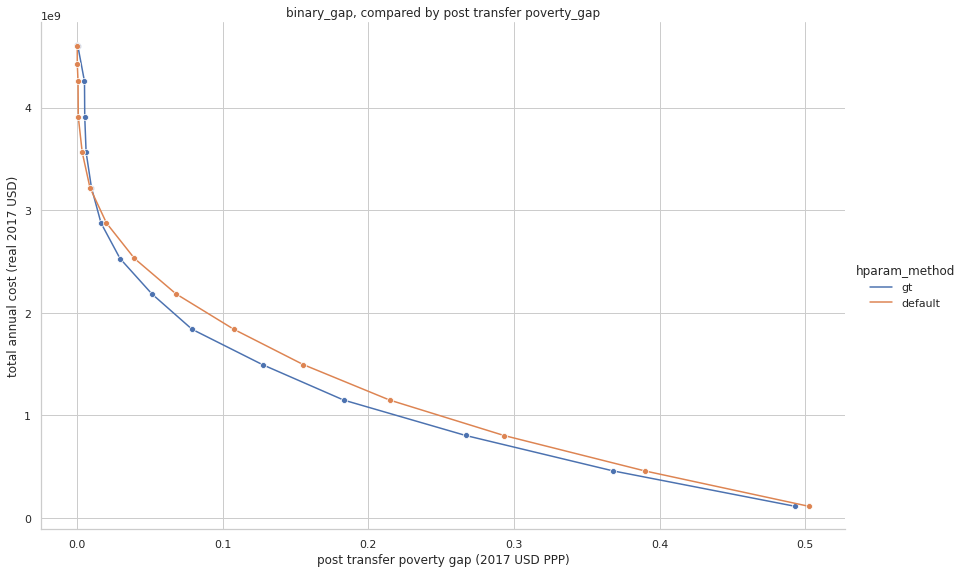

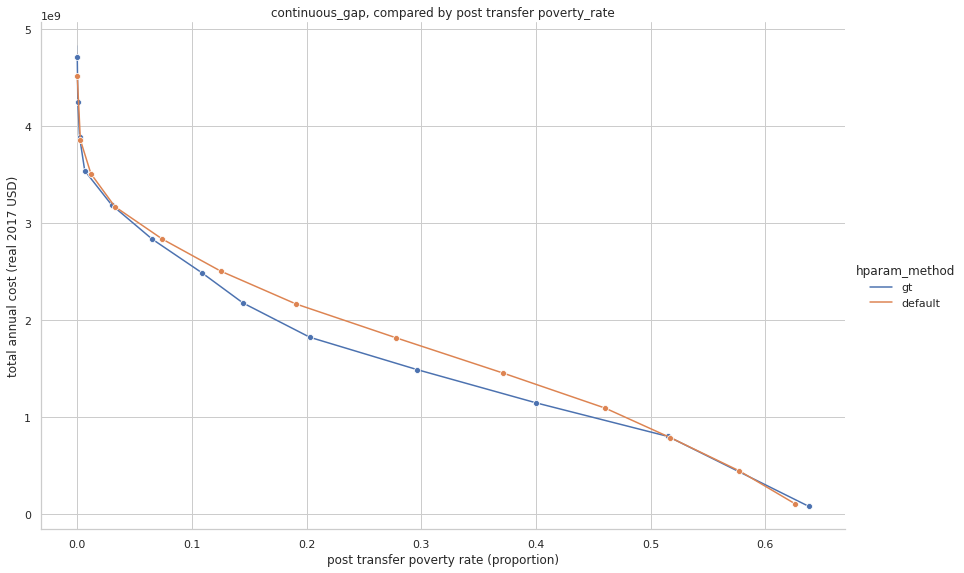

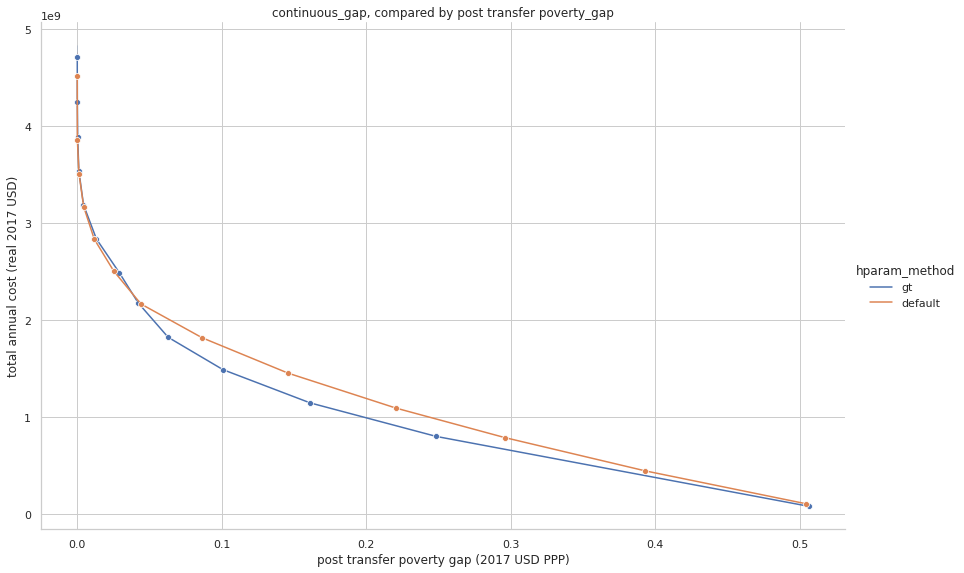

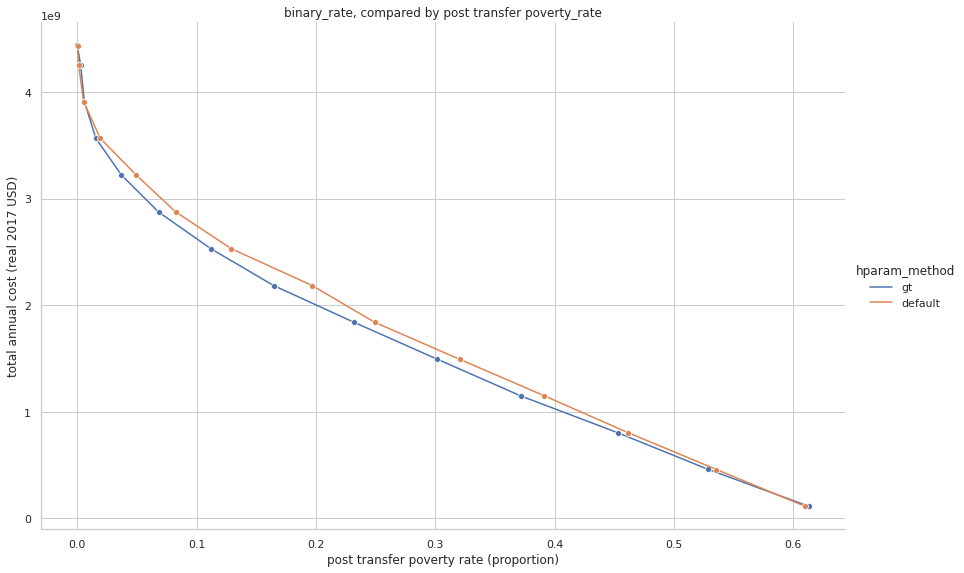

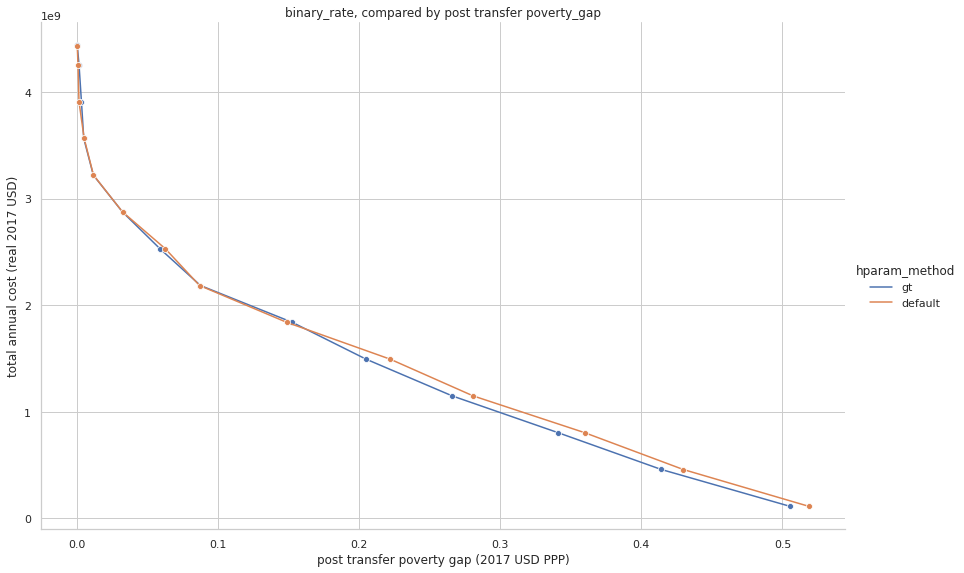

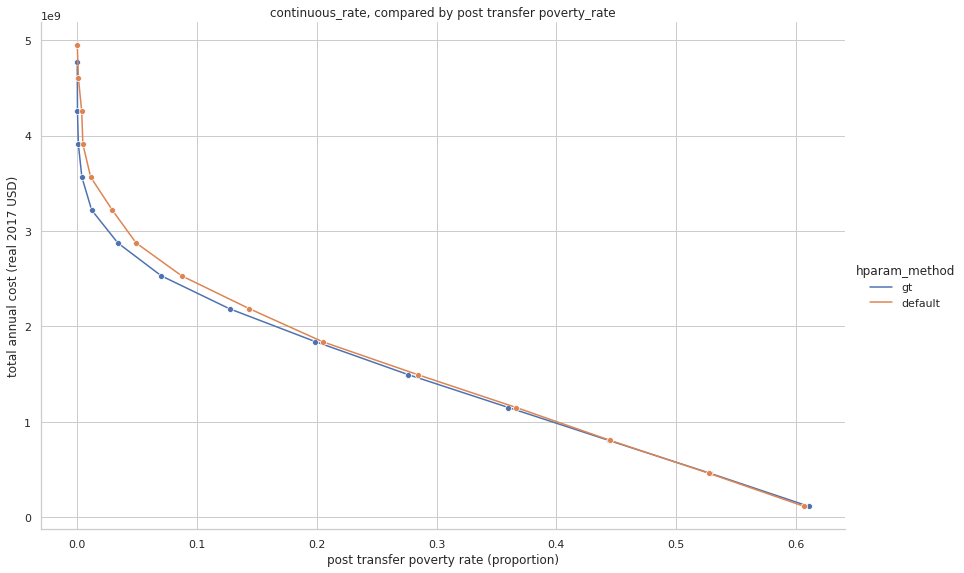

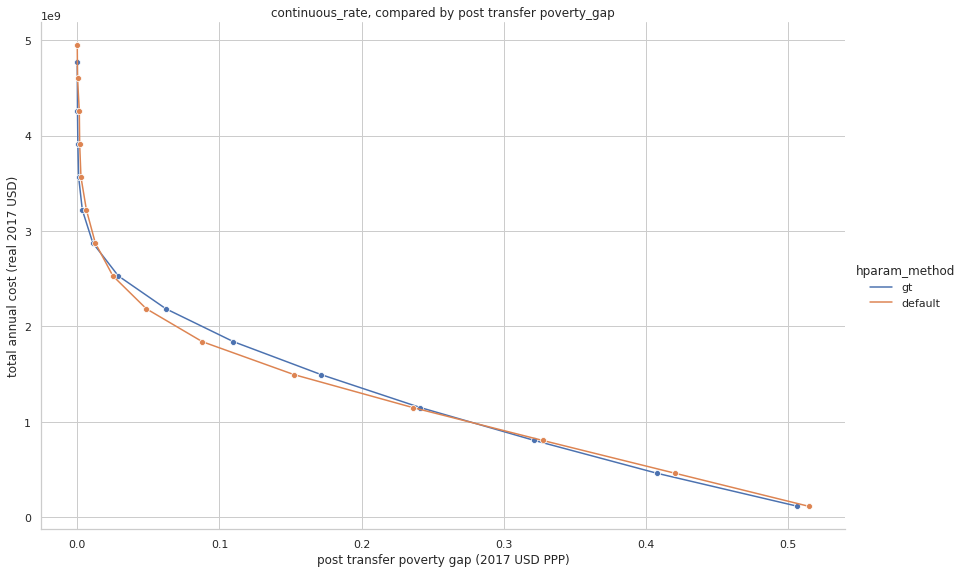

In [ ]:
sns.set_style("whitegrid")

for scheme in ('binary_gap', 'continuous_gap', 'binary_rate', 'continuous_rate'):
    performance_across_methods = []
    for hparam_method in ('gt', 'default'):
        if hparam_method == 'gt':
            method_prefix = 'output_gt'
        else:
            method_prefix = hparam_method
        performance = pd.read_csv(simulations_path / 'learn' / 'results' / f'{method_prefix}_{scheme}.csv')
        performance['total annual cost'] = performance['policy_cost_per_capita'] * cost_conversion_factor
        performance['hparam_method'] = hparam_method
        performance_across_methods.append(performance)
    
    performance_across_methods = pd.concat(performance_across_methods)

    for objective in ('poverty_rate', 'poverty_gap'):
        x_axis = f'post_transfer_{objective}'
        
        fg = relplot(
            data=performance_across_methods, x=x_axis, y='total annual cost', hue='hparam_method', kind='line',
            marker='o', height=8, aspect=12/8,
        )
        fg.set(title=f'{scheme}, compared by post transfer {objective}', ylabel='total annual cost (nominal 2017 USD)')
        if objective == 'poverty_gap':
            fg.set(xlabel='post transfer poverty gap (2017 USD PPP)')
        else:
            fg.set(xlabel='post transfer poverty rate (proportion)')
        fg.savefig(figs_path / f'{scheme}_by_{objective}.png')




## Comparing targeting approaches

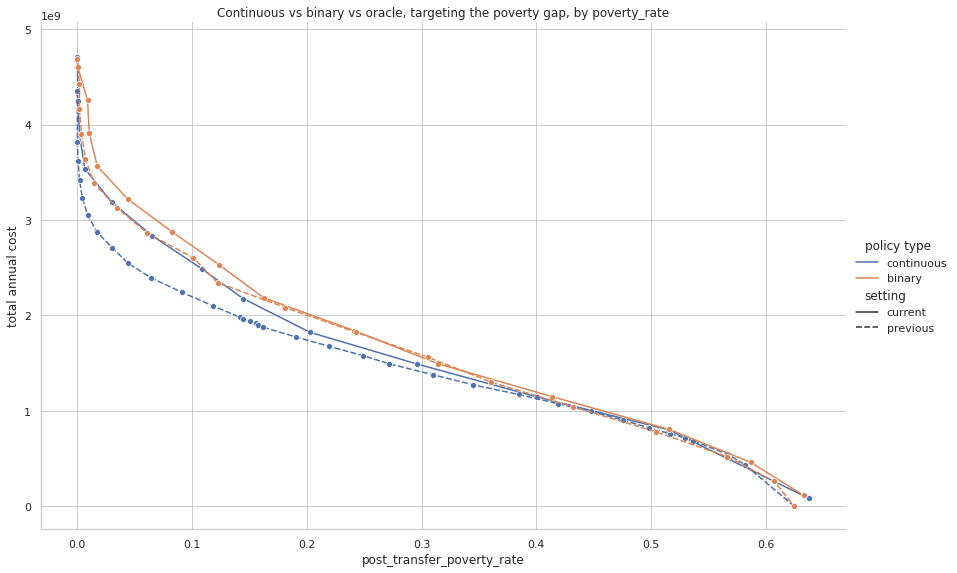

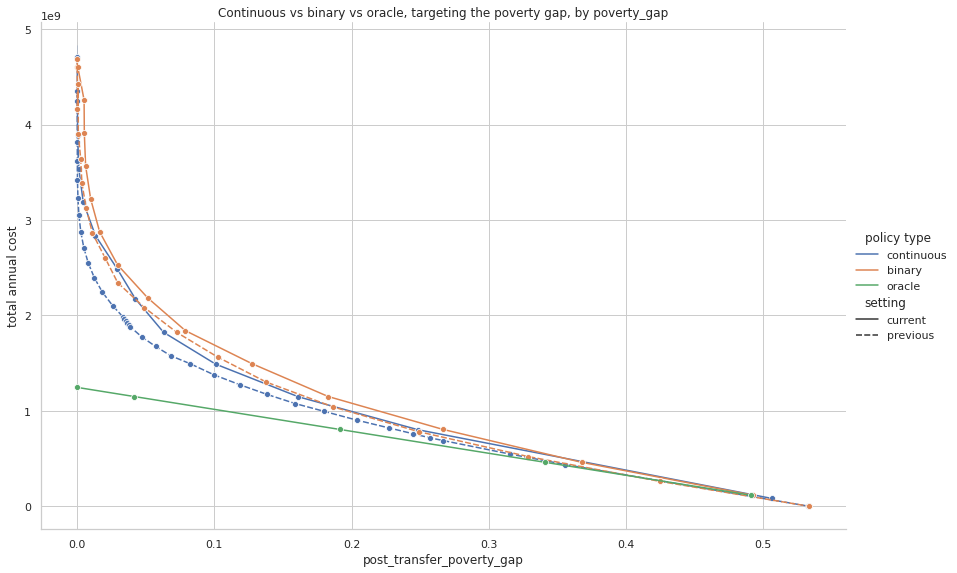

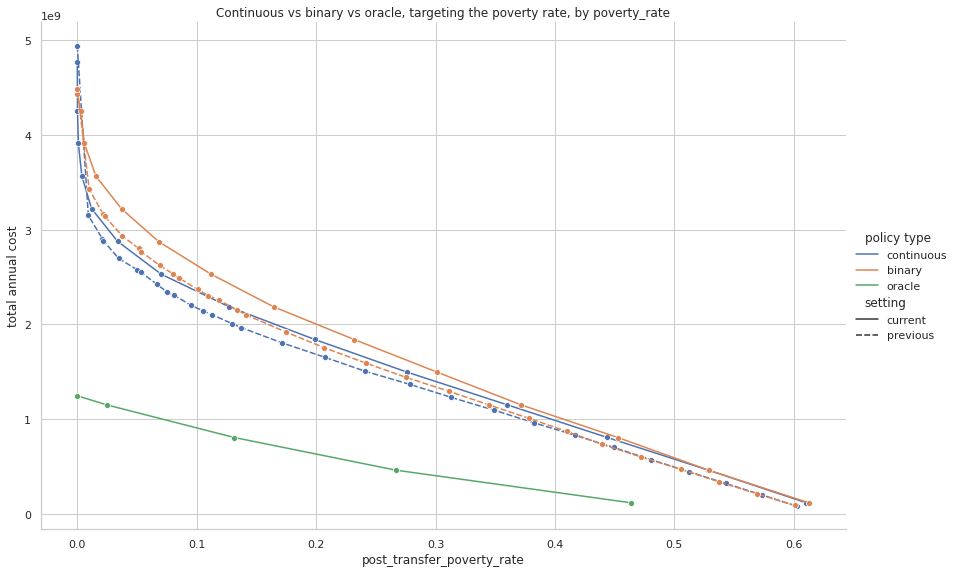

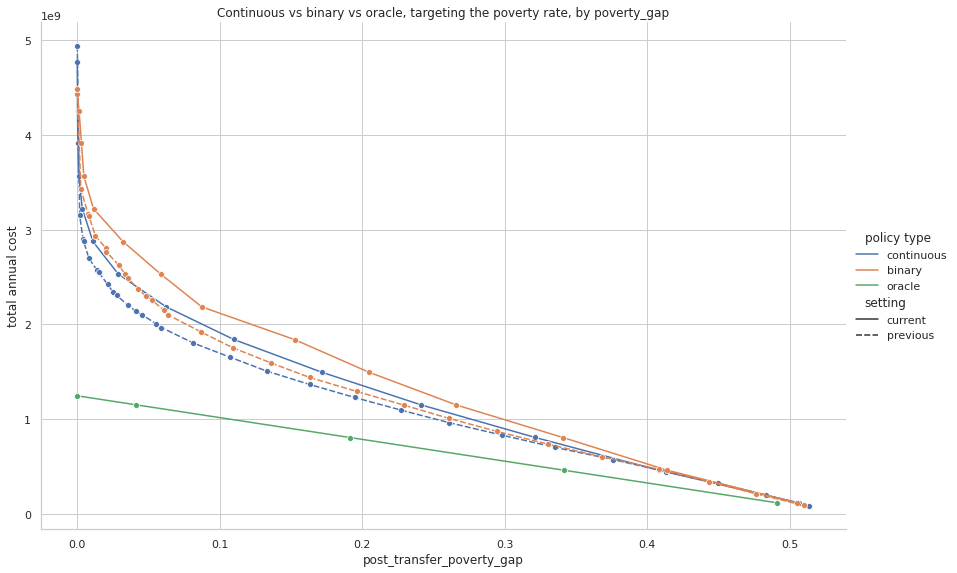

In [10]:
sns.set_style("whitegrid")

for target in ('gap', 'rate'):
    performance_across_targeting_approaches = []
    for transfer_method in ('continuous', 'binary', 'oracle'):
        if transfer_method in ('continuous', 'binary'):
            transfer_method_prefix = f'output_gt_{transfer_method}'
        else:
            transfer_method_prefix = transfer_method
        performance = pd.read_csv(simulations_path / 'learn' / 'results' / f'{transfer_method_prefix}_{target}.csv')
        performance['total annual cost'] = performance['policy_cost_per_capita'] * cost_conversion_factor
        performance['policy type'] = transfer_method
        performance['setting'] = 'current'

        performance_across_targeting_approaches.append(performance)

    for transfer_method in ('continuous', 'binary'):

        # Adjust to old file naming
        if target == 'rate':
            old_file_stem = f'{transfer_method}_unconditional_rate'
        if target == 'gap':
            old_file_stem = f'{transfer_method}_gap'

        previous_performance = pd.read_csv(previous_simulations_path / f'{old_file_stem}' / 'malawi.csv')

        columns_for_deduping = [
            'policy_type', 'unconditional_tolerance', 'conditional_tolerance', 'features', 
            'lambda', 'budget'
        ]
        columns_for_deduping = [
            column for column in columns_for_deduping if column in previous_performance.columns
        ]
        previous_performance = (
            previous_performance.drop_duplicates(subset=columns_for_deduping)
        )
        previous_performance['total annual cost'] = (
            previous_performance['policy_cost_per_capita'] * cost_conversion_factor
        )
        previous_performance['policy type'] = transfer_method
        previous_performance['setting'] = 'previous'
        performance_across_targeting_approaches.append(previous_performance)
    
    performance_across_targeting_approaches = pd.concat(performance_across_targeting_approaches)

    for objective in ('poverty_rate', 'poverty_gap'):

        if (
            objective == 'poverty_rate'
            and target == 'gap'
        ):
            to_plot = performance_across_targeting_approaches[
                performance_across_targeting_approaches['policy type'] != 'oracle'
            ]
        else:
            to_plot = performance_across_targeting_approaches

        x_axis = f'post_transfer_{objective}'
        
        fg = relplot(
            data=to_plot, x=x_axis, y='total annual cost', style='setting',
            hue='policy type', kind='line', 
            marker='o', height=8, aspect=12/8,
        )
        fg.set( title=f'Continuous vs binary vs oracle, targeting the poverty {target}, by {objective}')
        fg.savefig(figs_path / f'cont_vs_bin_{target}_by_{objective}.png')


